In [1]:
# Name : Jabed Umar
# Date : 22/02/2024
# Roll No : 2011072
# Course : Advanced Computational Physics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Library.MidSem import*
import Library.MidSem as ms

# Q.1 Root Finding using Regula Falsi and Newton Raphson Method

In [3]:
# Define the function
def func(x):
    return np.log(x/2) - np.sin(5*x/2)

# define the derivative function 
def dfunc(x):
    return 1/(2*x) - (5/2)*np.cos(5*x/2)

In [4]:
#defining the trancted number function
def truncated_number(x, n):
    return int(x*10**n)/10**n

In [5]:
# Check the existence of the root in the given interval
R = RootFindings(func, 1.5, 2.5, 1e-6, 10)
B = R.bracket(200,0.2)
print(B)

a= 1.5 ,b= 2.7 
Iterations: 201 

(1.5, 2.7)


In [6]:
# Find the root using the Regula Falsi method on the interval
S = R.regula_falsi()
print("The root of the function using Regula Falsi method to an accuracy 10^(-6) is: \n", truncated_number(S, 6))

The root of the function using Regula Falsi method to an accuracy 10^(-6) is: 
 2.62314


In [7]:
# Find the root using the Newton-Raphson method
N = R.newton(dfunc, 2.2)
print("The root of the function using Newton Ralphson method to an accuracy 10^(-6) is: \n", truncated_number(N, 6))

The root of the function using Newton Ralphson method to an accuracy 10^(-6) is: 
 2.62314


In [27]:
##################_ -______________________ Compare the two methods 
F = RootFindings(func, 1.5, 2.5, 1e-6, 7)
B = F.bracket(200,0.2)
print(B)

s = F.regula_falsi()
print("The root of the function using Regula Falsi method is: \n", s)

a= 1.5 ,b= 2.7 
Iterations: 201 

(1.5, 2.7)
The root of the function using Regula Falsi method is: 
 2.6231403354363083


In [28]:
E = RootFindings(func, 1.5, 2.5, 1e-6, 6)
n = E.newton(dfunc, 2.2)
print("The root of the function using Newton Ralphson method is: \n", n)

# So Regula Falsi method takes more time (iteration) to converge than Newton-Raphson method

The root of the function using Newton Ralphson method is: 
 2.6231405047047285


# Q.2 Solving Heat Equation using Shooting Method

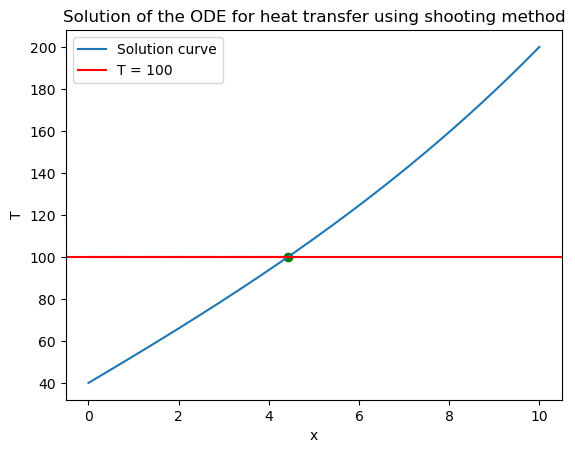

In [ ]:
# Defining the double derivative of T with respect to x
def d2Tdx2(x, T, z):
    return -0.01*(20-T)  #alpha = 0.01
# defining the single derivative of T with respect to x
def dTdx(x, T, z):
    return z
# initial conditions
xi = 0 # initial position
Ti = 40  # initial temperature
xf = 10  # final position
Tf = 200 # final temperature
h = 0.01
tol = 1e-6
# calling the function from library
x, T = ms.shoot(d2Tdx2, dTdx, xi, Ti, xf, Tf, 10, 400, h, tol)
for i in range(len(T)):
    if T[i] >= 100:
        sol = i
        break
# plotting the solution of the PDE
plt.plot(x, T)
plt.title("Solution of the ODE for heat transfer using shooting method")
plt.xlabel("x")
plt.ylabel("T")
plt.axhline(y=100, color='r', linestyle='-')
plt.plot([0, x[sol]], [100, 100], color='r', linestyle='--')  # Plotting only up to the solution point
# plt.axvline(x=x[sol], color='g', linestyle='-')
plt.scatter(x[sol], T[sol], color='g')
plt.legend(["Solution curve", "T = 100"])
plt.show()

In [ ]:
# Finding the value of x at which the temperature is 100 deg C
print("The position of the solution is: ", truncated_number(x[sol], 2))
print("The temperature of the solution is: ", truncated_number(T[sol], 2))

The position of the solution is:  4.42
The temperature of the solution is:  100.07


# Q.3  Solving Heat Equation using Explicit Method

The stability factor (alpha) is 0.004999999999999999


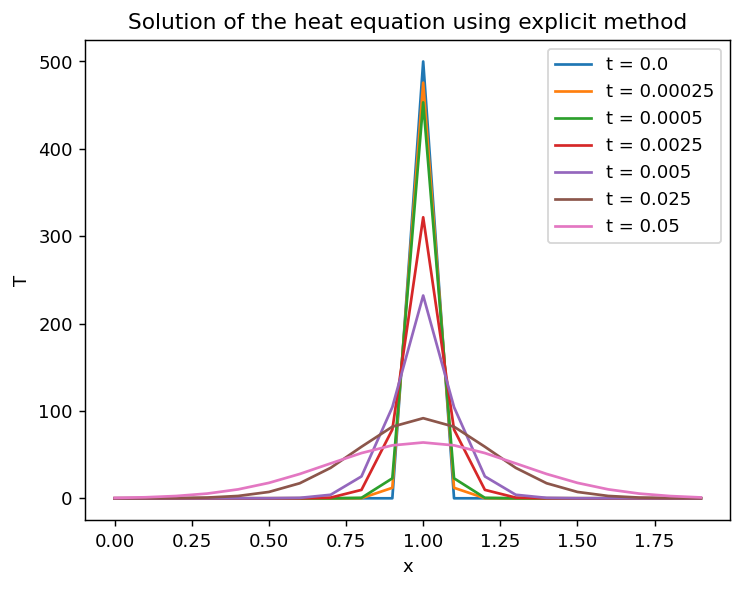

In [29]:
L = 2  # length of the rod
# defining the initial conditions
def temp0(i, nL):
    if nL%2: nL -= 1
    if i == nL/2: return 500
    return 0
T = 1
nL = 20
nT = 20000
A = HeatEquationSolver(temp0, L, T, nL, nT).explicit_solve()
# plotting the solution of the heat equation
# time steps
times = [0, 5, 10, 50, 100, 500,1000]
xs = [i*L/nL for i in range(nL)]
plt.figure(dpi=130)
for time in times:
    plt.plot(xs, A[time], label=f"t = {time*T/nT}")
plt.title("Solution of the heat equation using explicit method")
plt.xlabel("x")
plt.ylabel("T")
plt.legend()

# Q.4 Calculate the center of mass 

In [ ]:
## define the function for the linear mass density function
def rho(x):
    return x**2

In [ ]:
# finding the total mass of the rod
i = NumericalIntegration(rho, 0, 2, 100)
total_mass = i.midpoint()
# finding the sum of (x_i.m_i) of the rod at the given point
j = NumericalIntegration(lambda x: x*rho(x), 0, 2, 100)
x_coordinate = j.midpoint()
# finding the center of mass
c_o_m = x_coordinate/total_mass

In [ ]:
print("The center of mass of the given rod  is : ", truncated_number(c_o_m,4), "m")

The center of mass of the given rod  is :  1.4999 m


# Q.5 Solving the system of linear equations using LU Decomposition

In [ ]:
A = [[1,-1,4,0,2,9],
     [0,5,-2,7,8,4],
     [1,0,5,7,3,-2],
     [6,-1,2,3,0,8],
     [-4,2,0,5,-5,3],
     [0,7,-1,5,4,-2]]
b = [19,2,13,-7,-9,2]

L = LinearEquationDirect(A, b)
K = L.LU_decompose()
print("The solution of the linear equation is:\n", K)

The solution of the linear equation is:
 [-1.761817043997862, 0.8962280338740133, 4.051931404116158, -1.6171308025395421, 2.041913538501913, 0.15183248715593525]


In [ ]:
#trancate the number to 4 decimal places
for i in range(len(K)):
    K[i] = truncated_number(K[i],4)
print("The solution of the linear equation upto 4 decimal place is is:\n", K)

The solution of the linear equation upto 4 decimal place is is:
 [-1.7618, 0.8962, 4.0519, -1.6171, 2.0419, 0.1518]
